In [ ]:
import pandas as pd
import numpy as np

In [ ]:
!ls

In [ ]:
cds = pd.read_csv('CAISO_2017to2018_stack.csv', index_col = 0)

In [ ]:
cds.head()

In [ ]:
wind = cds.loc[cds['Source']=='WIND TOTAL',:]

In [ ]:
wind.head()

In [ ]:
windex = pd.to_datetime(wind.index)

In [ ]:
windex.hour

In [ ]:
wind_min = []
wind_max = []
for i in range(0,24):
    wind_min.append( np.min( wind.loc[windex.hour == i,'MWh'] ) )
    wind_max.append( np.max( wind.loc[windex.hour == i,'MWh'] ) )

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df_wind = pd.DataFrame(wind_min)

In [ ]:
df_wind.head()

In [ ]:
df_wind.columns

In [ ]:
df_wind.columns = ['Min']

In [ ]:
df_wind['Max'] = (wind_max)

In [ ]:
df_wind.head()

## Row and Column labels

In [ ]:
fruit_info_df = pd.read_csv('fruit_info.csv', index_col= False)

In [ ]:
fruit_info_df['fruit']

In [ ]:
fruit_info_df.columns

In [ ]:
fruit_info_df.columns = ['fruit','colour', 'weight']

## Merge

In [ ]:
price_df = pd.DataFrame({'price':[1.0, 3.60, 0.75, 0.05], 'frut':['apple', 'banana', 'orange', 'rasberry']})

In [ ]:
price_df

In [ ]:
pd.merge(fruit_info_df, price_df, left_on= 'fruit', right_on = 'frut', how = 'outer')

In [ ]:
pd.merge(fruit_info_df, price_df, left_on='fruit', right_on= 'frut')

In [ ]:
cols = list(price_df.columns)
cols

In [ ]:
cols[1] = 'fruit'

In [ ]:
price_df.columns = cols

## Groupby

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.DataFrame({'key1':['a', 'a', 'b', 'b', 'a'],
                  'key2':['one', 'two', 'one', 'two', 'one'],
                  'data1': np.random.rand(5),
                  'data2': np.random.rand(5)})
df

,key1,key2,data1,data2
0,a,one,0.566571,0.784849
1,a,two,0.599237,0.004930
2,b,one,0.942573,0.669299
3,b,two,0.594288,0.867517
4,a,one,0.604732,0.183649


In [3]:
grouped = df['data1'].groupby(df['key1'])

In [5]:
grouped.groups

{'a': Int64Index([0, 1, 4], dtype='int64'),
 'b': Int64Index([2, 3], dtype='int64')}

In [6]:
grouped.aggregate(min)

key1
a    0.566571
b    0.594288
Name: data1, dtype: float64

In [8]:
grouped = df[['data1', 'data2']].groupby(df['key1'])

In [9]:
grouped.aggregate(min)

,data1,data2
key1,,
a,0.566571,0.004930
b,0.594288,0.669299


In [10]:
grouped = df.groupby(df['key1'])

In [11]:
grouped.aggregate(min)

,key2,data1,data2
key1,,,
a,one,0.566571,0.004930
b,one,0.594288,0.669299


In [12]:
cds = pd.read_csv('CAISO_2017to2018_stack.csv', index_col= 0)
cds.head()

,Source,MWh
2017-08-29 00:00:00,GEOTHERMAL,1181
2017-08-29 00:00:00,BIOMASS,340
2017-08-29 00:00:00,BIOGAS,156
2017-08-29 00:00:00,SMALL HYDRO,324
2017-08-29 00:00:00,WIND TOTAL,1551


In [15]:
cds_time = pd.to_datetime(cds.index)
cds['hour'] = cds_time.hour

In [17]:
cds.head(10)

,Source,MWh,hour
2017-08-29 00:00:00,GEOTHERMAL,1181,0
2017-08-29 00:00:00,BIOMASS,340,0
2017-08-29 00:00:00,BIOGAS,156,0
2017-08-29 00:00:00,SMALL HYDRO,324,0
2017-08-29 00:00:00,WIND TOTAL,1551,0
2017-08-29 00:00:00,SOLAR PV,0,0
2017-08-29 00:00:00,SOLAR THERMAL,0,0
2017-08-29 01:00:00,GEOTHERMAL,1182,1
2017-08-29 01:00:00,BIOMASS,338,1
2017-08-29 01:00:00,BIOGAS,156,1


In [30]:
cds_grouped = cds['MWh'].groupby([cds['Source'],cds['hour']])

In [31]:
cds_grouped.mean()

Source         hour
BIOGAS         0        225.591781
               1        225.964384
               2        225.953425
               3        225.887671
               4        225.753425
               5        225.243836
               6        224.479452
               7        222.454795
               8        221.536986
               9        221.539726
               10       221.408219
               11       221.802740
               12       222.731507
               13       223.290411
               14       223.465753
               15       223.717808
               16       224.342466
               17       224.767123
               18       225.473973
               19       226.136986
               20       225.958904
               21       225.797260
               22       225.430137
               23       225.498630
BIOMASS        0        318.301370
               1        318.369863
               2        319.846575
               3        320.567123


In [32]:
import matplotlib.pyplot as plt

In [33]:
averages = pd.DataFrame(cds_grouped.mean())

In [34]:
averages

MWh
Source        hour             
BIOGAS        0      225.591781
              1      225.964384
              2      225.953425
              3      225.887671
              4      225.753425
              5      225.243836
              6      224.479452
              7      222.454795
              8      221.536986
              9      221.539726
              10     221.408219
              11     221.802740
              12     222.731507
              13     223.290411
              14     223.465753
              15     223.717808
              16     224.342466
              17     224.767123
              18     225.473973
              19     226.136986
              20     225.958904
              21     225.797260
              22     225.430137
              23     225.498630
BIOMASS       0      318.301370
              1      318.369863
              2      319.846575
              3      320.567123
              4      321.742466
              5      323.863014
...                         ...
SOLAR THERMAL 18      85.958904
              19      10.364384
              20       1.279452
              21       0.539726
              22       0.136986
              23       0.104110
WIND TOTAL    0     2173.268493
              1     2120.778082
              2     2051.832877
              3     1973.969863
              4     1881.463014
              5     1772.484932
              6     1646.630137
              7     1490.194521
              8     1363.402740
              9     1290.512329
              10    1250.408219
              11    1247.643836
              12    1308.287671
              13    1412.410959
              14    1561.602740
              15    1726.652055
              16    1878.441096
              17    2005.934247
              18    2109.093151
              19    2181.361644
              20    2229.408219
              21    2231.687671
              22    2220.109589
              23    2216.526027

[168 rows x 1 columns]

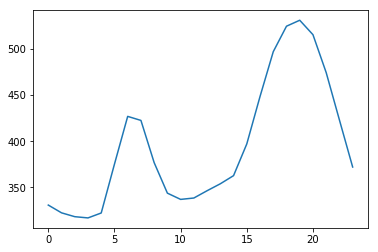

In [35]:
plt.plot(averages.loc[('SMALL HYDRO',),:])

In [37]:
cds.pivot_table(
    values = 'MWh',
    index = 'hour',
    columns = 'Source',
    aggfunc = 'mean')

Source,BIOGAS,BIOMASS,GEOTHERMAL,SMALL HYDRO,SOLAR PV,SOLAR THERMAL,WIND TOTAL
hour,,,,,,,
0,225.591781,318.301370,958.720548,330.824658,0.679452,0.000000,2173.268493
1,225.964384,318.369863,959.235616,322.421918,0.643836,0.000000,2120.778082
2,225.953425,319.846575,959.367123,318.249315,0.635616,0.000000,2051.832877
3,225.887671,320.567123,958.367123,316.909589,0.419178,0.000000,1973.969863
4,225.753425,321.742466,956.347945,322.254795,0.413699,0.000000,1881.463014
5,225.243836,323.863014,956.230137,375.180822,0.482192,0.021918,1772.484932
6,224.479452,330.808219,955.682192,426.931507,352.956164,4.372603,1646.630137
7,222.454795,333.178082,953.263014,422.564384,2489.268493,58.317808,1490.194521
8,221.536986,333.936986,949.024658,376.813699,5552.531507,208.106849,1363.402740
